<a href="https://colab.research.google.com/github/HwangHanJae/CP1_Project/blob/main/make_ingredient_table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastparquet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 12.9 MB/s 
     |████████████████████████████████| 1.6 MB 65.1 MB/s 


In [ ]:
import pandas as pd

In [ ]:
ingredient_path = '/content/drive/MyDrive/CP1/ingredient_text_preprocessing2.parquet'
df_path = '/content/drive/MyDrive/CP1/만개의 레시피.csv'
df = pd.read_csv(df_path, encoding='cp949')
ingredient_df = pd.read_parquet(ingredient_path, engine='fastparquet')

df.shape, ingredient_df.shape

((128400, 18), (56744, 3))

In [ ]:
ingredient_df.head()

,id,ingredient,only_ingred
0,128671,"[[어묵, 2, 개], [김밥용김, 3, 장], [당면, 1, 움큼], [양파, 0...","[어묵, 김밥용김, 당면, 양파, 당근, 깻잎, 튀김가루, 올리브유, 간장, 참기름]"
1,131871,"[[현미, 4, 컵], [찹쌀, 2, 컵], [호두, 50, g], [물, 0.5,...","[현미, 찹쌀, 호두, 물, 소금]"
2,139247,"[[북어포, 1, 마리], [찹쌀가루, 1, C]]","[북어포, 찹쌀가루]"
3,149207,"[[파스타면, 1, 단위]]",[파스타면]
4,151148,"[[건표고버섯, 9, 개], [오이, 0.5, 개], [당근, 0.5, 개], [양...","[건표고버섯, 오이, 당근, 양파, 사과, 그외의, 과일]"


# 전체 원본 데이터에서 필요한 칼럼만 추출
- 추출 칼럼 : 레시피 일련번호, 요리명

In [ ]:
copy_df = df[['RCP_SNO', 'CKG_NM']].copy()
copy_df.head()

,RCP_SNO,CKG_NM
0,128671,어묵김말이
1,128892,NaN
2,128932,NaN
3,131871,현미호두죽
4,139247,북어갈비


## 칼럼명 변경
- RCP_SNO : id
- CKG_NM : menu

In [ ]:
copy_df = copy_df.rename(columns = {"RCP_SNO" : "id", "CKG_NM" :"menu"})

# 텍스트 전처리 진행 후 [재료명, 단위, 단위명]으로 분류한 칼럼 추출

In [ ]:
copy_ingredient_df = ingredient_df[['id','ingredient']].copy()

# 추출한 데이터 합치기

In [ ]:
new_df = pd.merge(copy_ingredient_df, copy_df, on='id')
new_df.head()

,id,ingredient,menu
0,128671,"[[어묵, 2, 개], [김밥용김, 3, 장], [당면, 1, 움큼], [양파, 0...",어묵김말이
1,131871,"[[현미, 4, 컵], [찹쌀, 2, 컵], [호두, 50, g], [물, 0.5,...",현미호두죽
2,139247,"[[북어포, 1, 마리], [찹쌀가루, 1, C]]",북어갈비
3,149207,"[[파스타면, 1, 단위]]",토마토스파게티
4,151148,"[[건표고버섯, 9, 개], [오이, 0.5, 개], [당근, 0.5, 개], [양...",표고버섯탕수


# 새로생긴 데이터프레임 칼럼순서 변경

In [ ]:
new_df.shape

(56744, 3)

In [ ]:
new_df = new_df[['id', 'menu','ingredient']]
new_df.head()

,id,menu,ingredient
0,128671,어묵김말이,"[[어묵, 2, 개], [김밥용김, 3, 장], [당면, 1, 움큼], [양파, 0..."
1,131871,현미호두죽,"[[현미, 4, 컵], [찹쌀, 2, 컵], [호두, 50, g], [물, 0.5,..."
2,139247,북어갈비,"[[북어포, 1, 마리], [찹쌀가루, 1, C]]"
3,149207,토마토스파게티,"[[파스타면, 1, 단위]]"
4,151148,표고버섯탕수,"[[건표고버섯, 9, 개], [오이, 0.5, 개], [당근, 0.5, 개], [양..."


# 밑에 데이터 구조 만들기

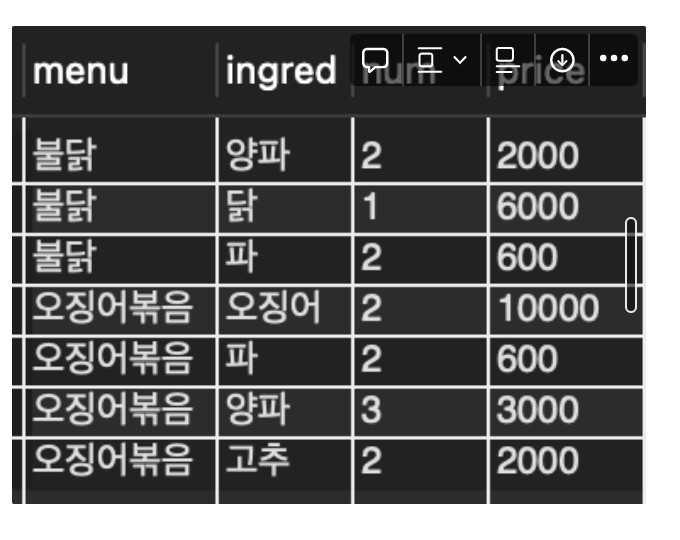

In [ ]:
from tqdm import tqdm
dfs = []

for i in tqdm(range(len(new_df))):
  data1 = pd.DataFrame(columns=['id','menu'])
  data2 = pd.DataFrame(new_df.iloc[i,:]['ingredient'], columns=['ingred','num','unit'])

  concat_df = pd.concat([data1, data2],axis=1)
  concat_df['id'] = new_df.iloc[i]['id']
  concat_df['menu'] = new_df.iloc[i]['menu']
  dfs.append(concat_df)

100%|██████████| 56744/56744 [02:43<00:00, 346.98it/s]


In [ ]:
df_recipe = pd.concat(dfs, axis=0).reset_index(drop=True)
df_recipe.shape

(331572, 5)

In [ ]:
df_recipe.head()

,id,menu,ingred,num,unit
0,128671,어묵김말이,어묵,2,개
1,128671,어묵김말이,김밥용김,3,장
2,128671,어묵김말이,당면,1,움큼
3,128671,어묵김말이,양파,0.5,개
4,128671,어묵김말이,당근,0.5,개
